In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess

In [325]:
# Run the data generation script
subprocess.run(["pip", "install", "-r", "requirements.txt"])
subprocess.run(["g++", "-o", "fourier", "fourier.cpp", "-lm"])
subprocess.run(["./fourier"])

CompletedProcess(args=['./fourier'], returncode=0)

In [326]:
csv_file = []
for file in os.listdir():
    if file.endswith(".csv"):
        csv_file.append(file)
        print(file)


trajectory_position.csv
PID1.csv
inverted_trajectory_component.csv
alternative_kalman2.csv
luenberger2.csv
alternative_kalman1.csv
inverted_trajectory_position.csv
kalman2.csv
extended_kalman1.csv
trajectory_component.csv
kalman1.csv
PID2.csv
luenberger1.csv
extended_kalman2.csv
LQR1.csv
LQR2.csv


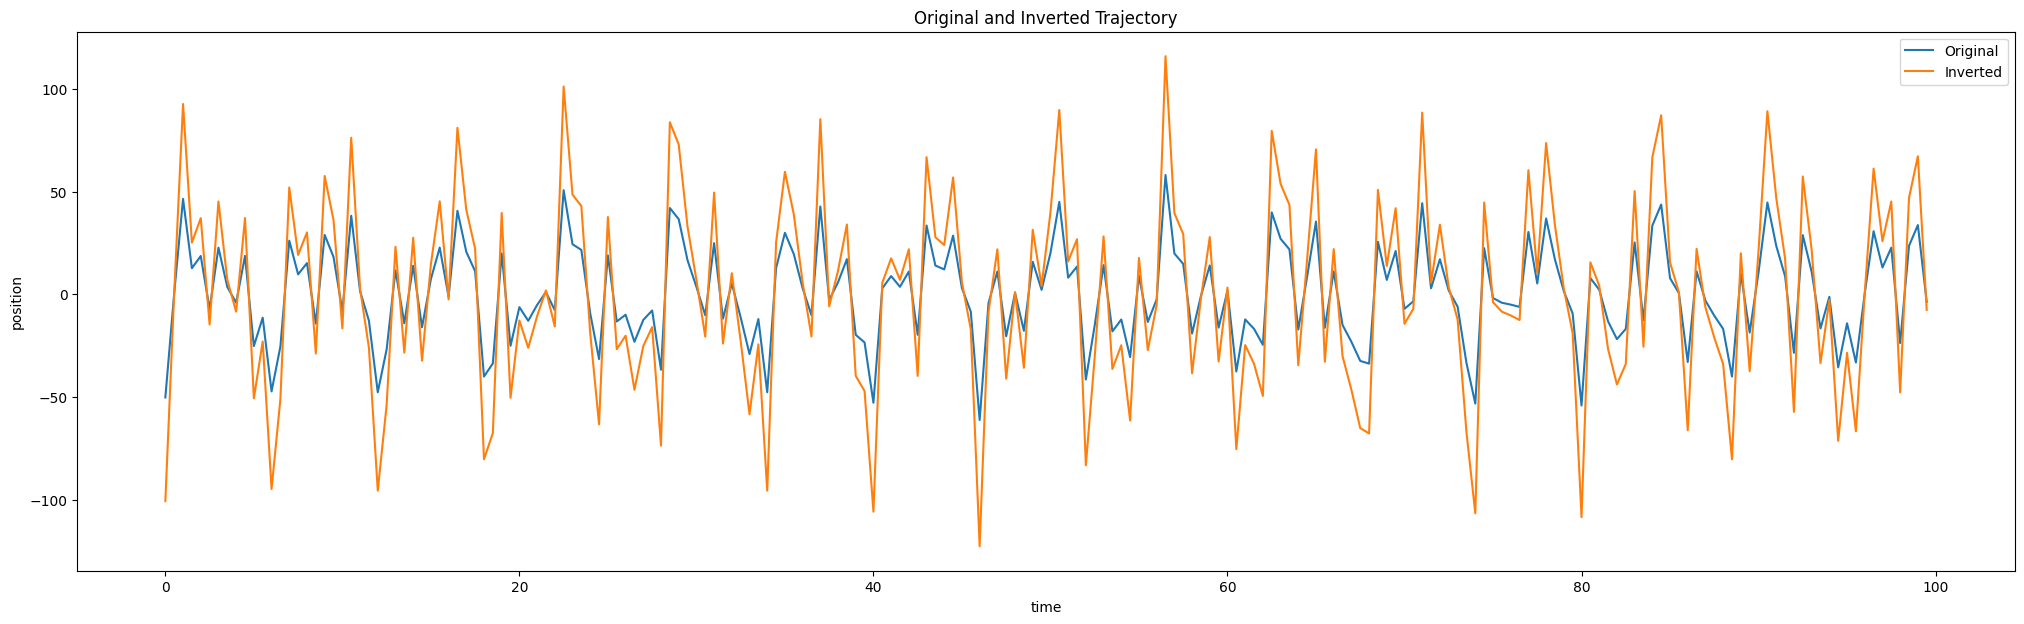

In [327]:
trajectory = pd.read_csv("trajectory_position.csv")
inverted_trajectory = pd.read_csv("inverted_trajectory_position.csv")

# plot in a figure size x=25, y=7
fig = plt.figure(figsize=(25, 7))
plt.plot(trajectory["time"], trajectory["position"])
plt.plot(inverted_trajectory["time"], inverted_trajectory["position"])
plt.xlabel("time")
plt.ylabel("position")
plt.title("Original and Inverted Trajectory")
plt.legend(["Original", "Inverted"])
plt.show()

In [328]:
# Combine trajectory and inverted trajectory dataframes with unique headers
trajectory_component = pd.read_csv("trajectory_component.csv")
inverted_trajectory_component = pd.read_csv("inverted_trajectory_component.csv")

# convert to table
trajectory_component = trajectory_component.pivot_table(index="n", values=["angular_velocity", "amplitude", "phase"])
inverted_trajectory_component = inverted_trajectory_component.pivot_table(index="n", values=["angular_velocity", "amplitude", "phase"])

trajectory_component

amplitude  angular_velocity    phase
n                                      
0    6.52222          3.842890  2.74088
1   17.16140          5.196330  2.28360
2   15.00910         -2.044780  2.46598
3   12.88370          3.153180  2.86610
4   18.89390         -0.919014  2.06008

In [329]:
inverted_trajectory_component

amplitude  angular_velocity     phase
n                                       
0    0.55948          0.000000  0.000000
1    1.12683          0.062832 -0.025872
2    1.15052          0.125664 -0.051017
3    1.19146          0.188496 -0.074692
4    1.25187          0.251327 -0.096251

[' running_average(5)', ' position_error', ' PI_output', ' smoothed_output']


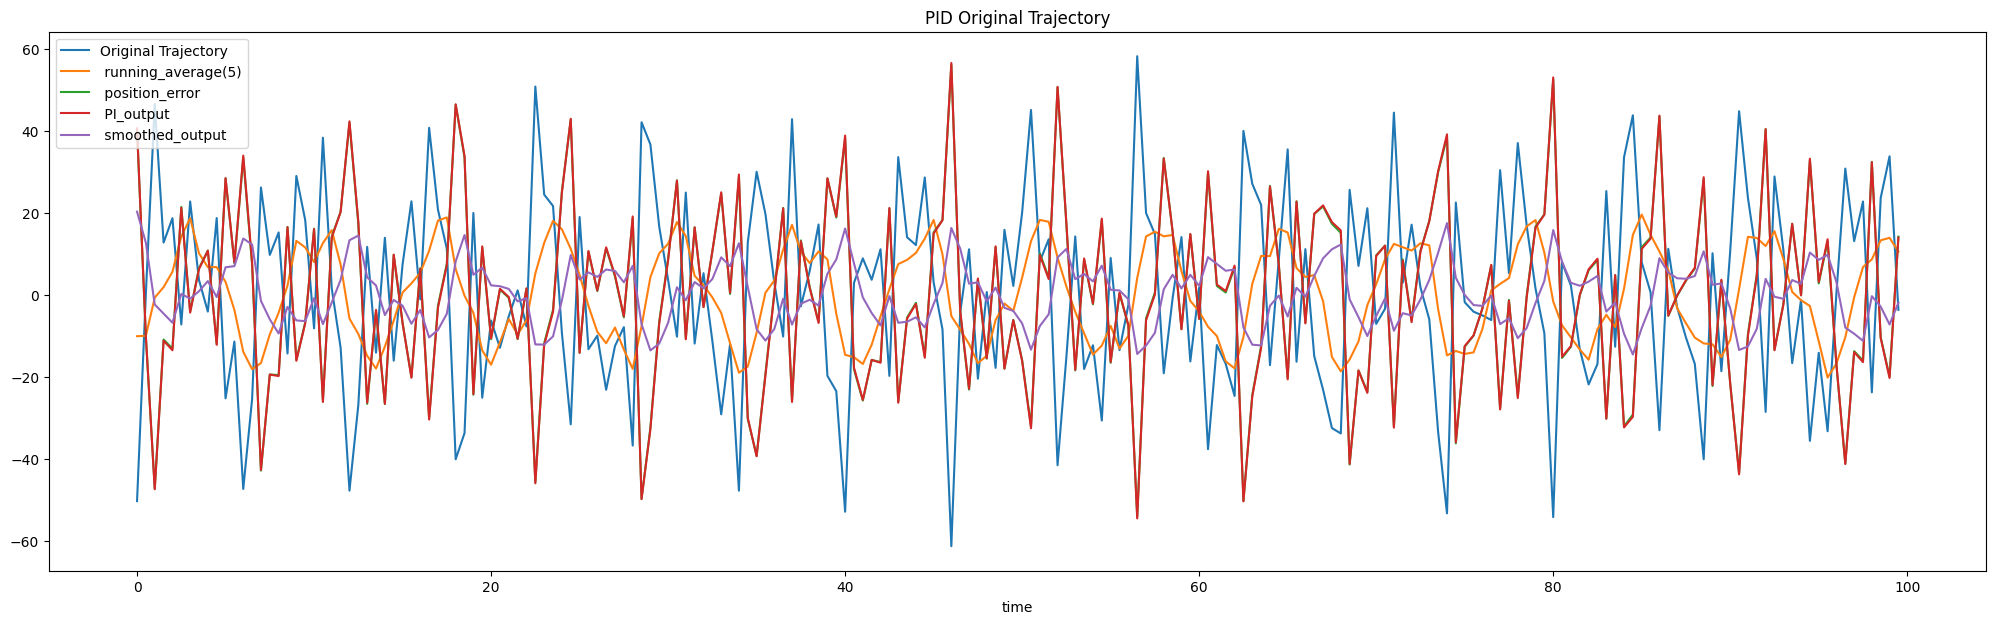

['predicted_position', 'filtered_position', 'position_error', 'kalman_gain_position', 'kalman_gain_velocity']


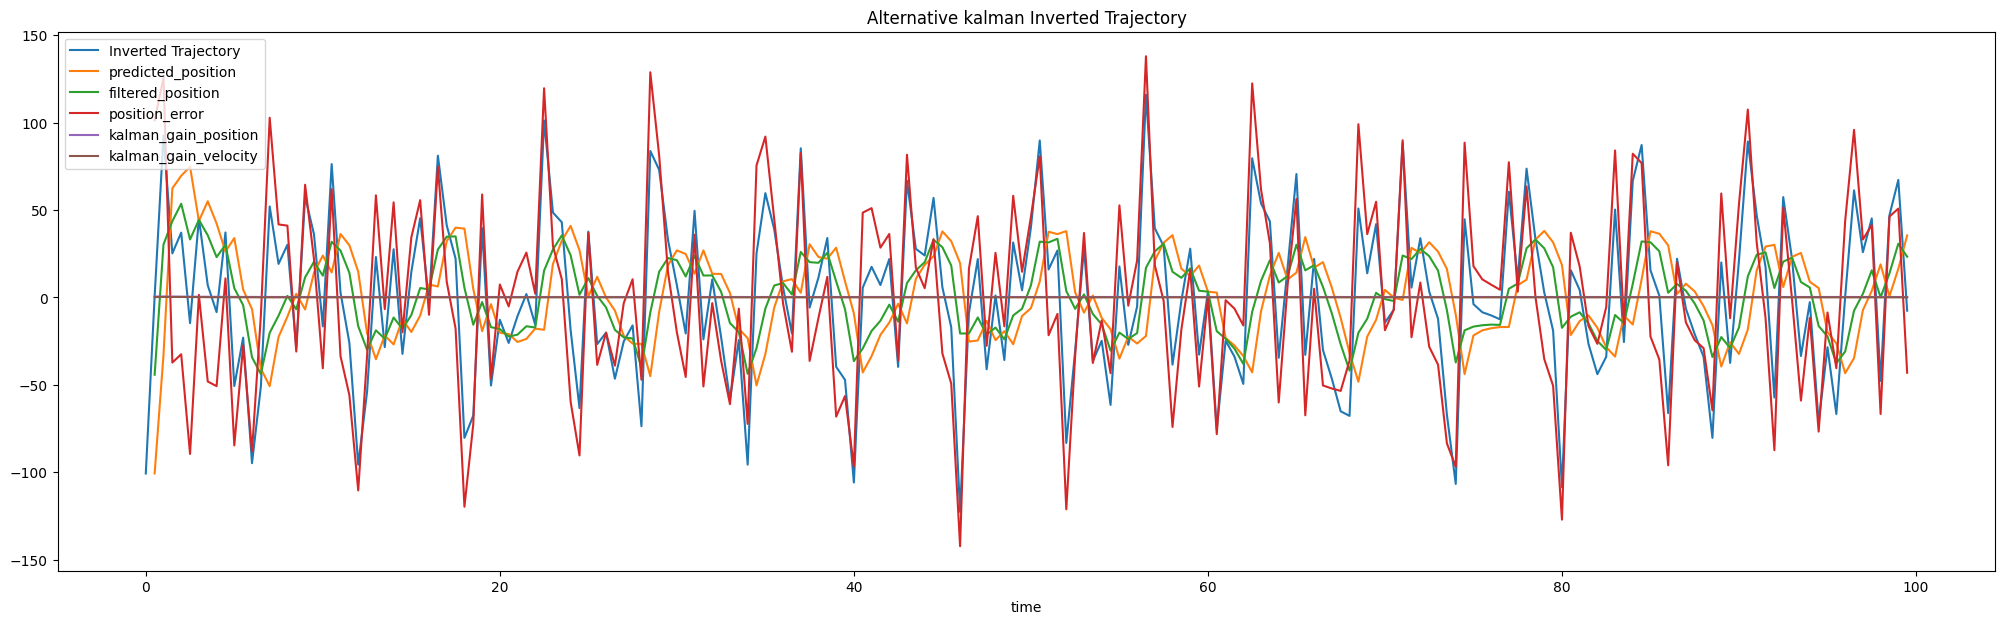

['estimated_position']


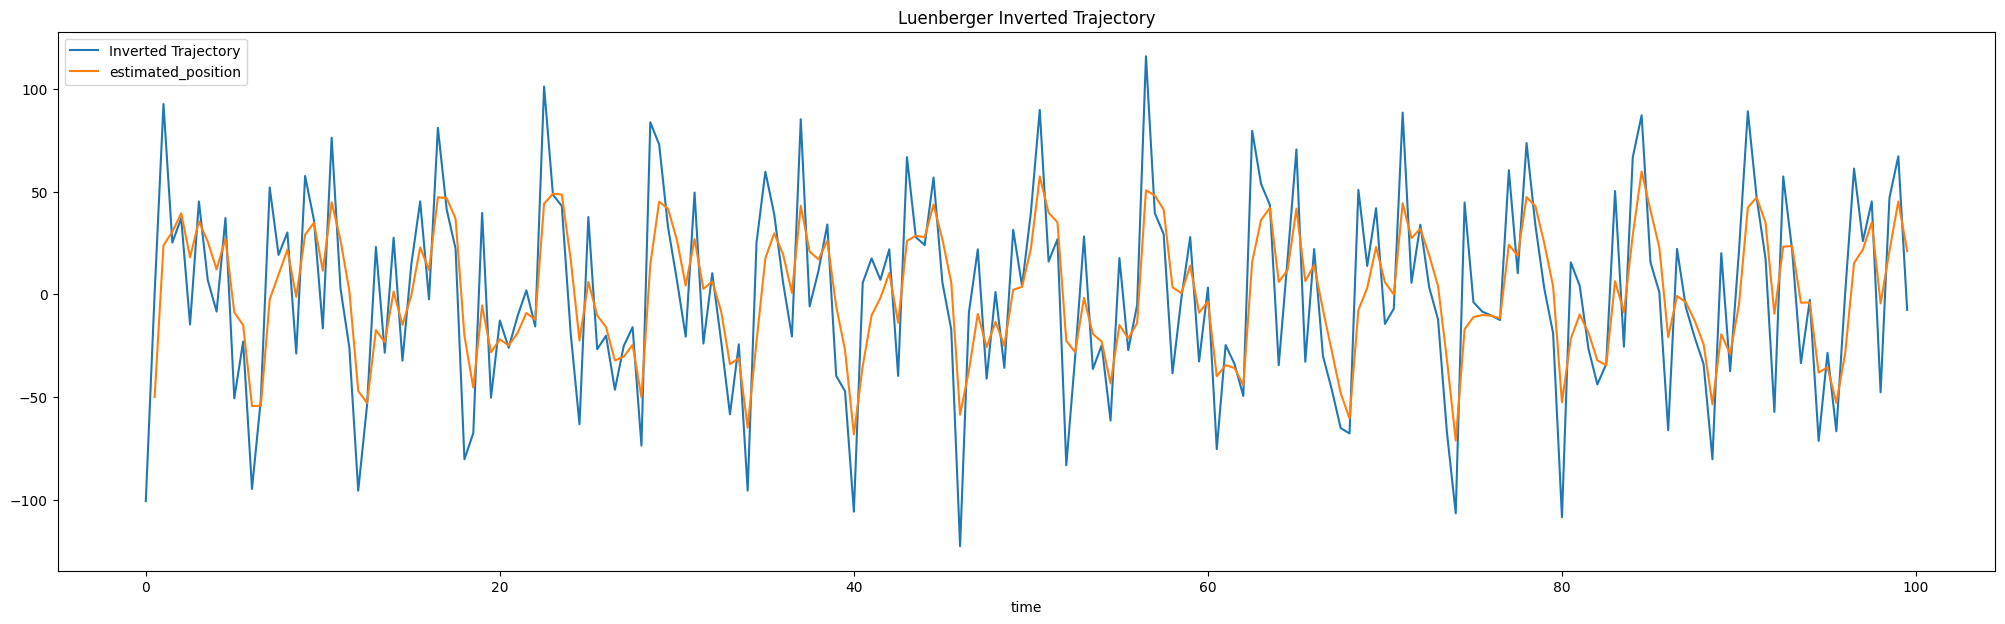

['predicted_position', 'filtered_position', 'position_error', 'kalman_gain_position', 'kalman_gain_velocity']


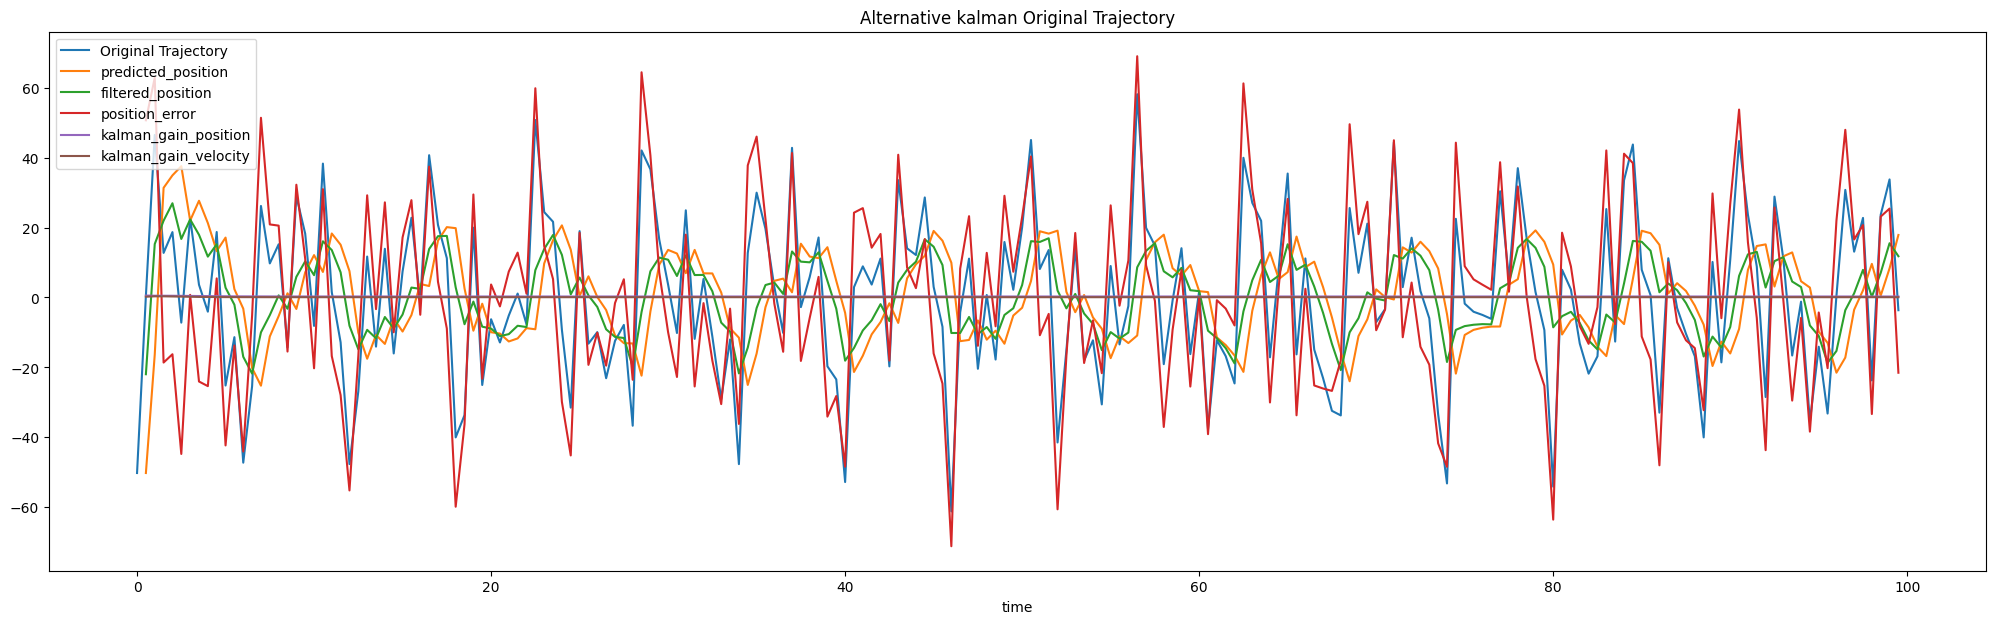

[' running_average(5)', ' position_error', ' PI_output', ' smoothed_output', ' PID_out', ' kalman_estimate', ' kalman_gain']


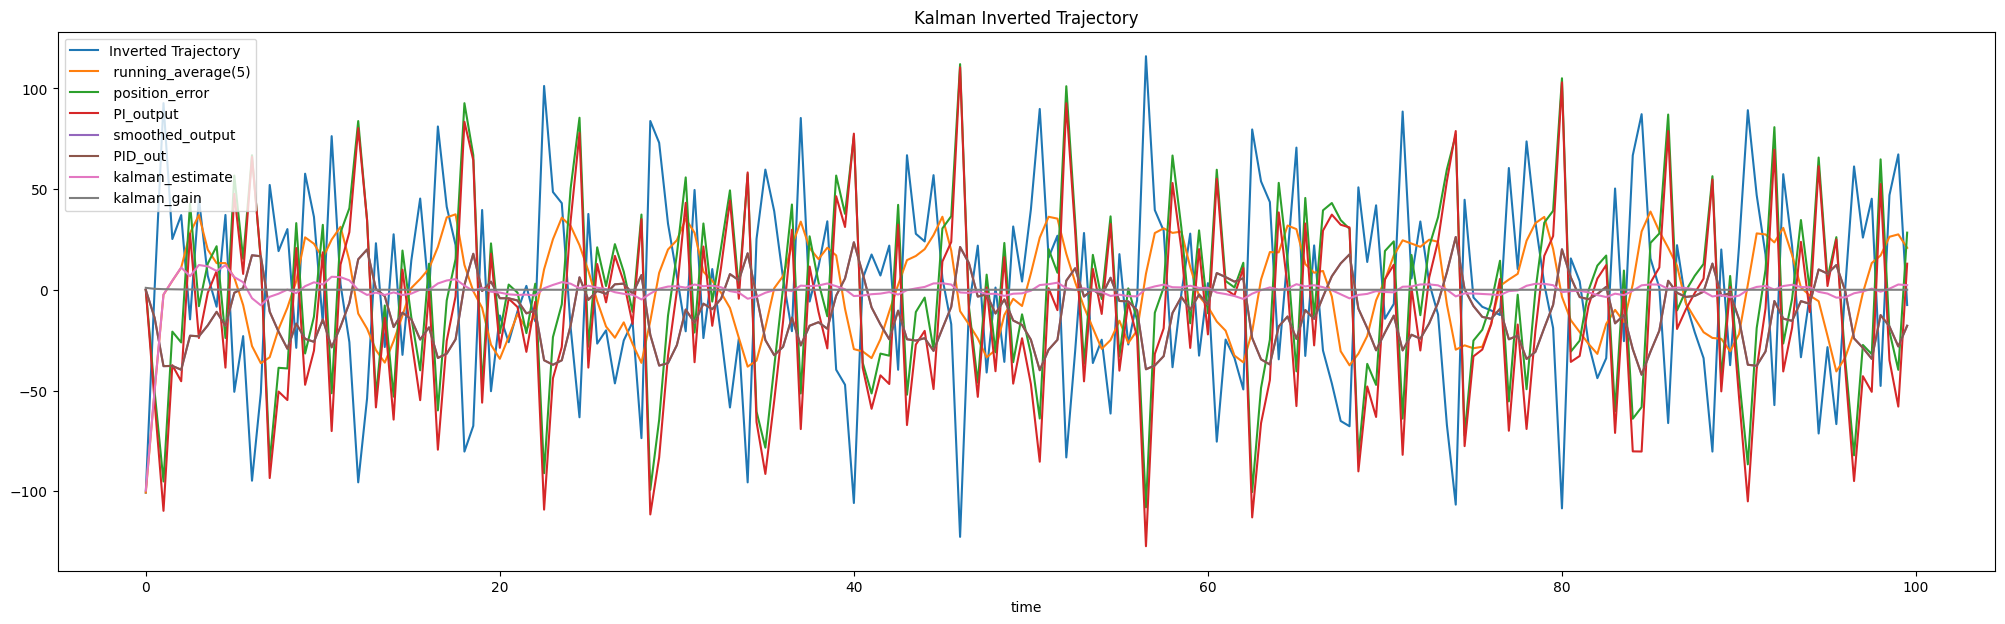

['predicted_position', 'filtered_position', 'position_error']


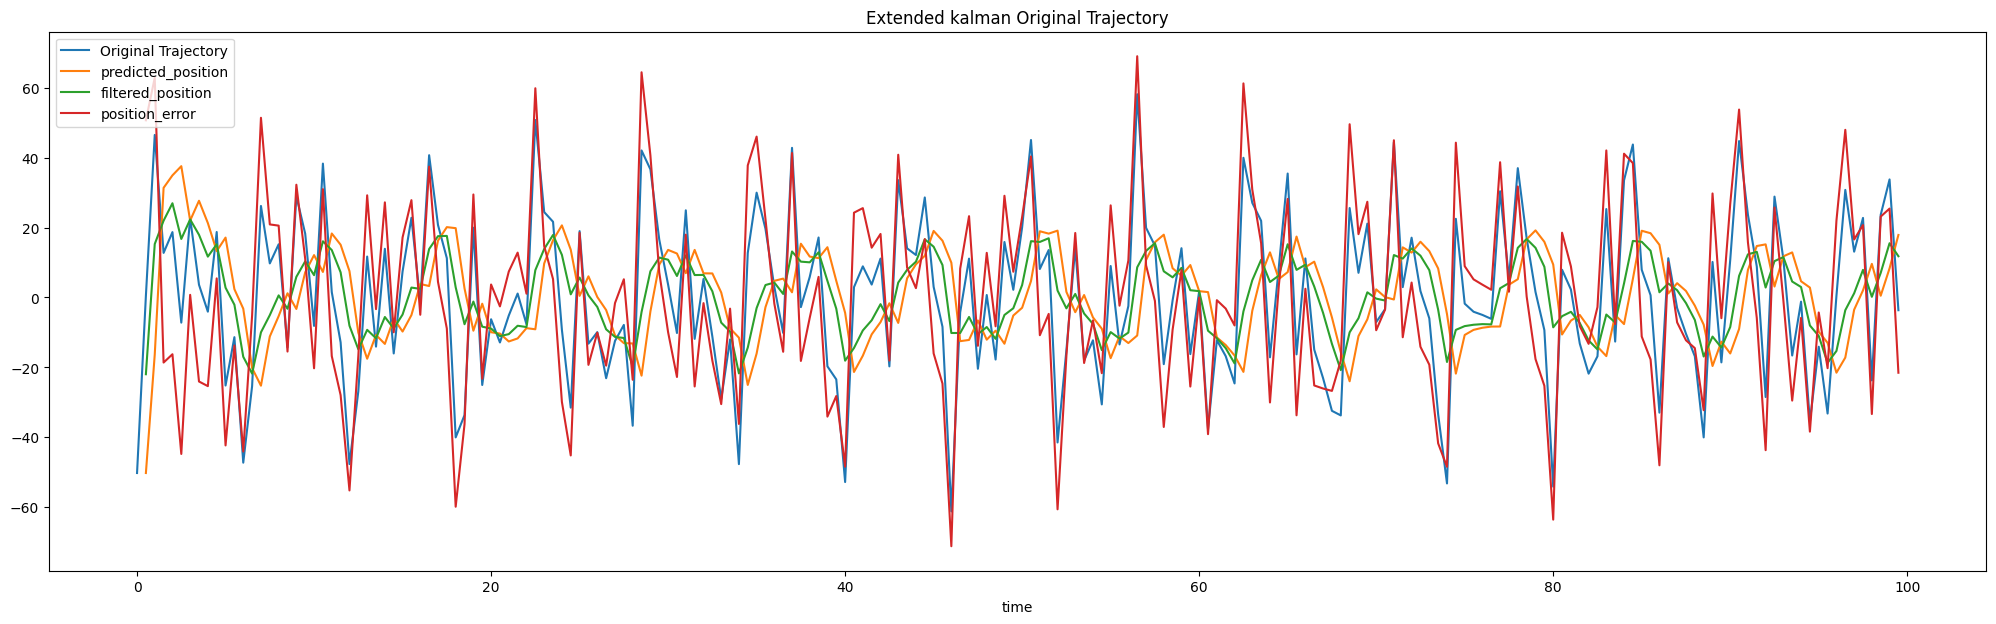

[' running_average(5)', ' position_error', ' PI_output', ' smoothed_output', ' PID_out', ' kalman_estimate', ' kalman_gain']


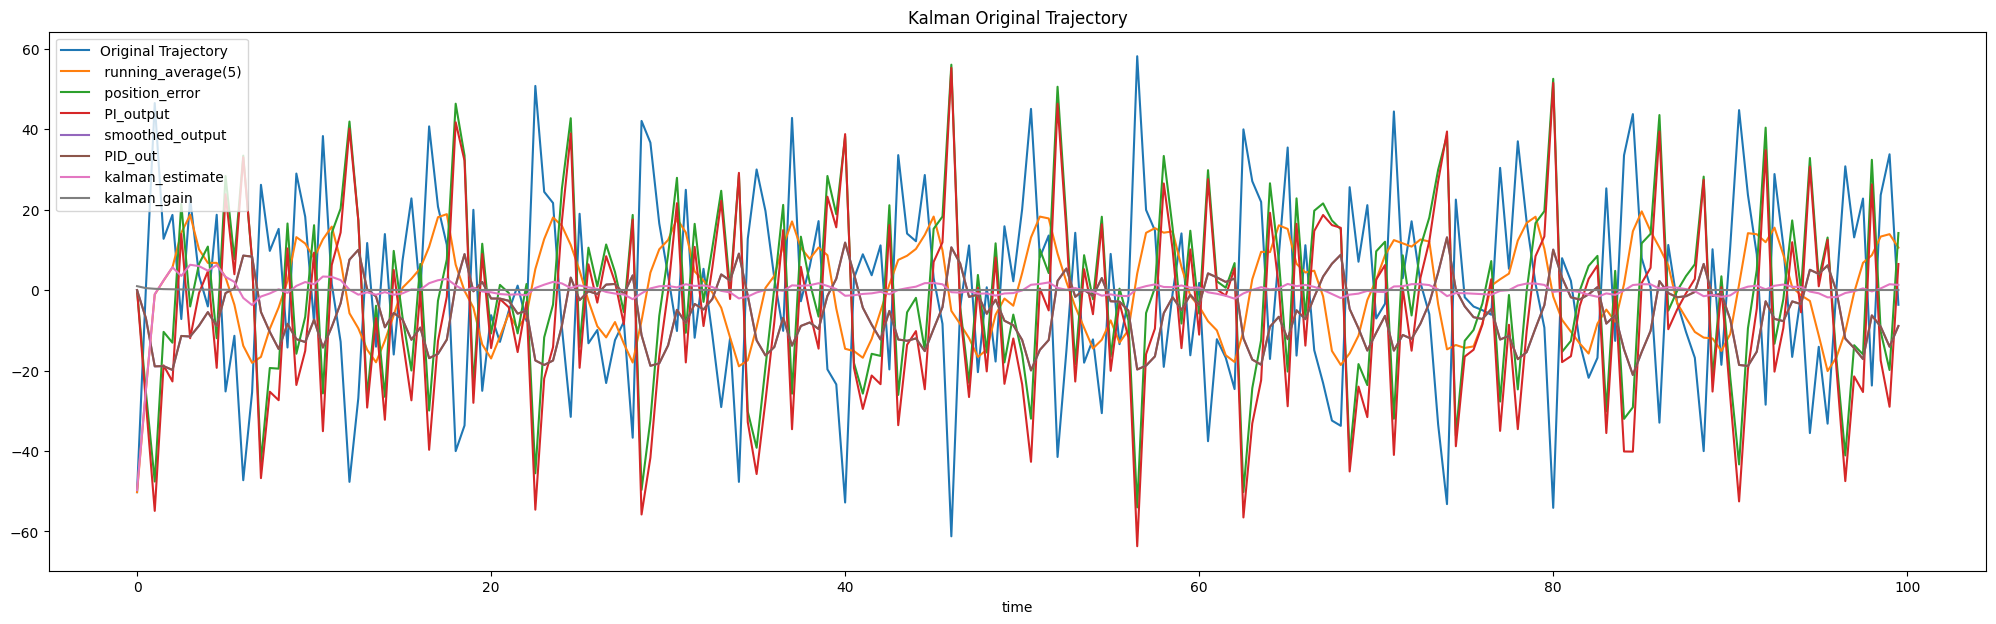

[' running_average(5)', ' position_error', ' PI_output', ' smoothed_output']


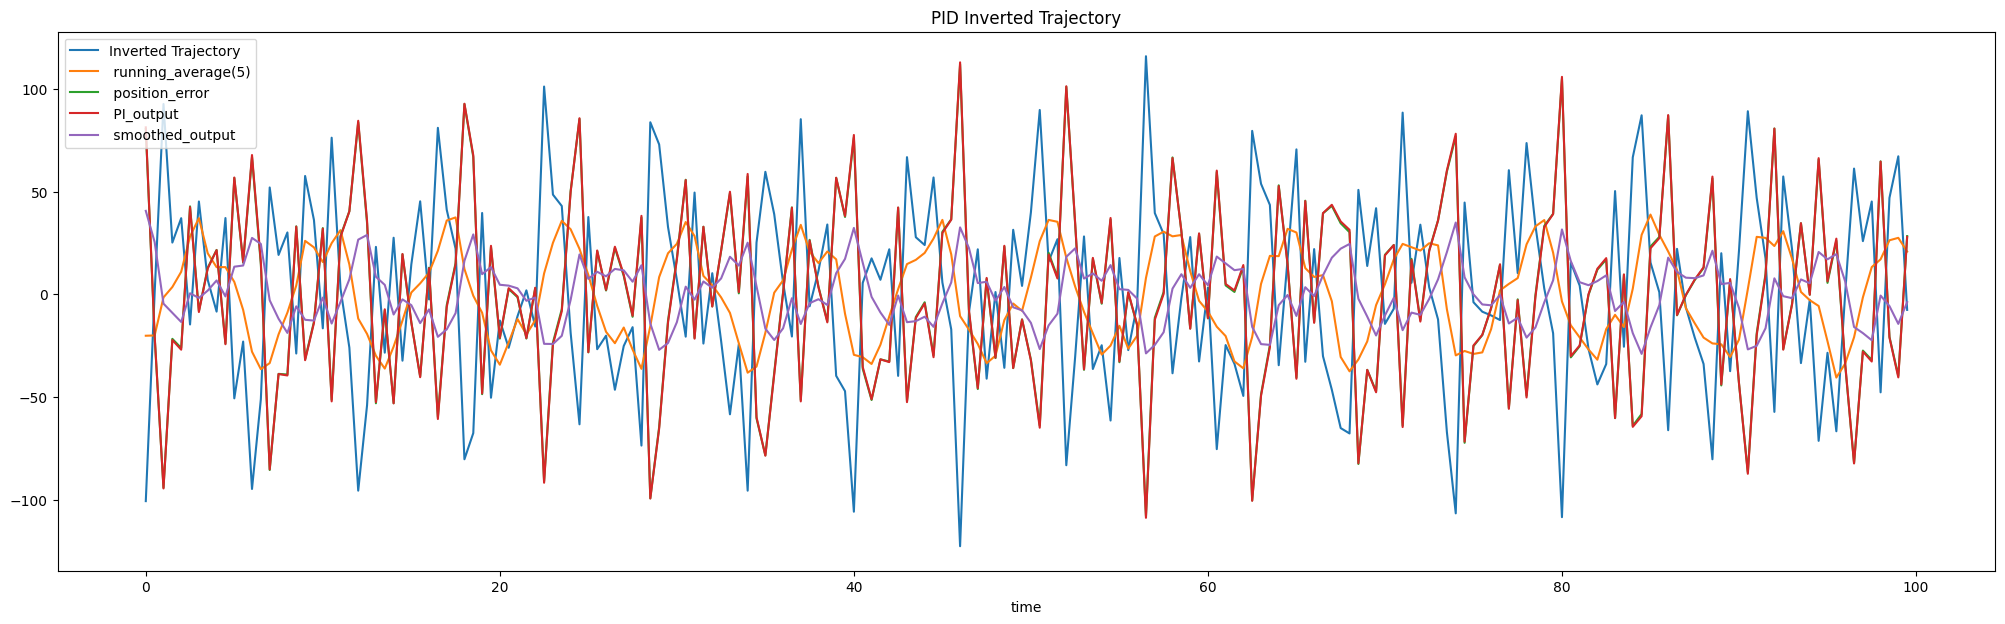

['estimated_position']


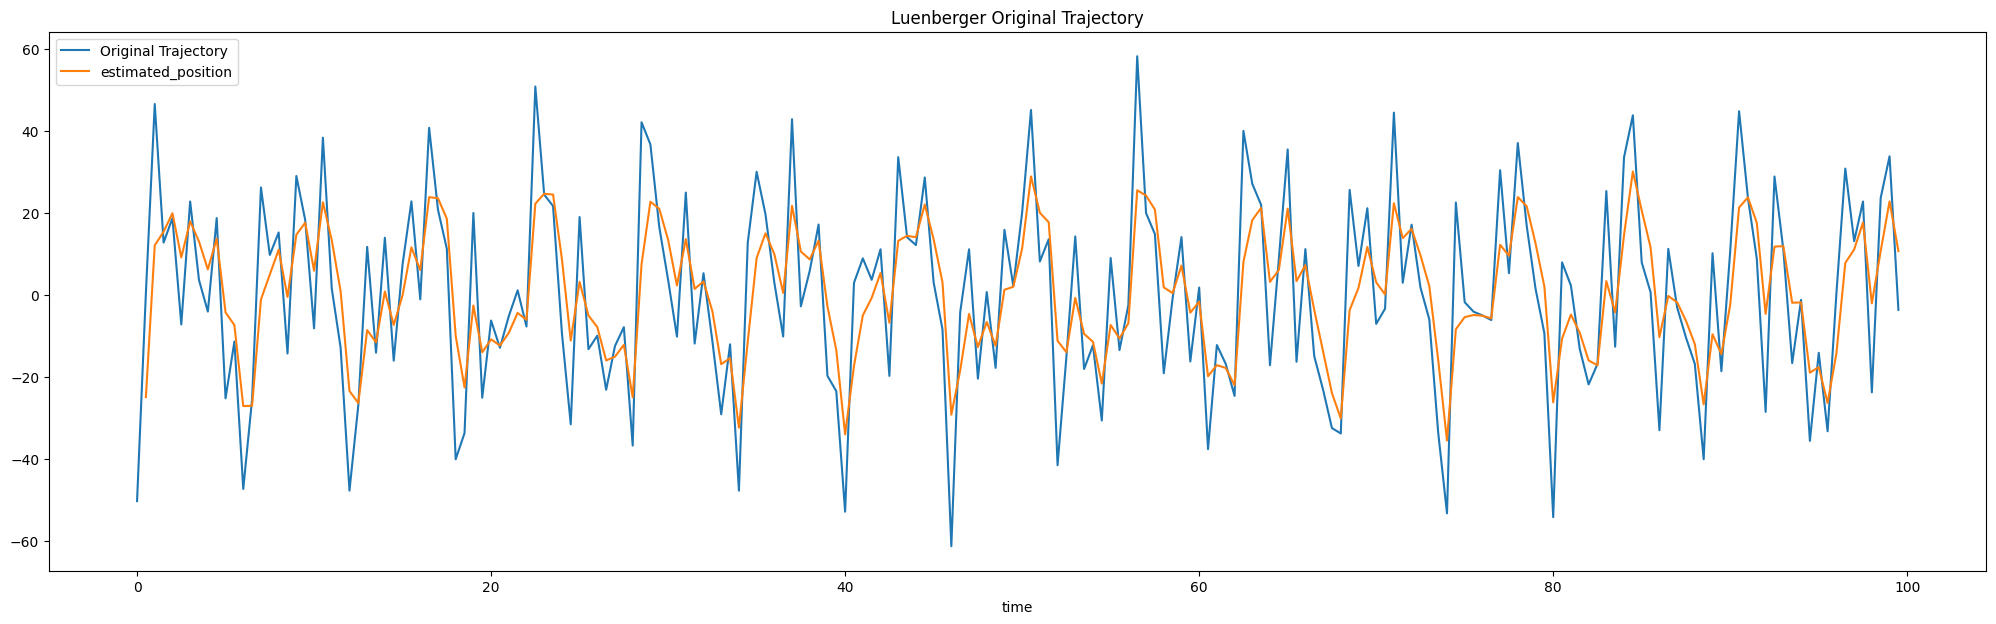

['predicted_position', 'filtered_position', 'position_error']


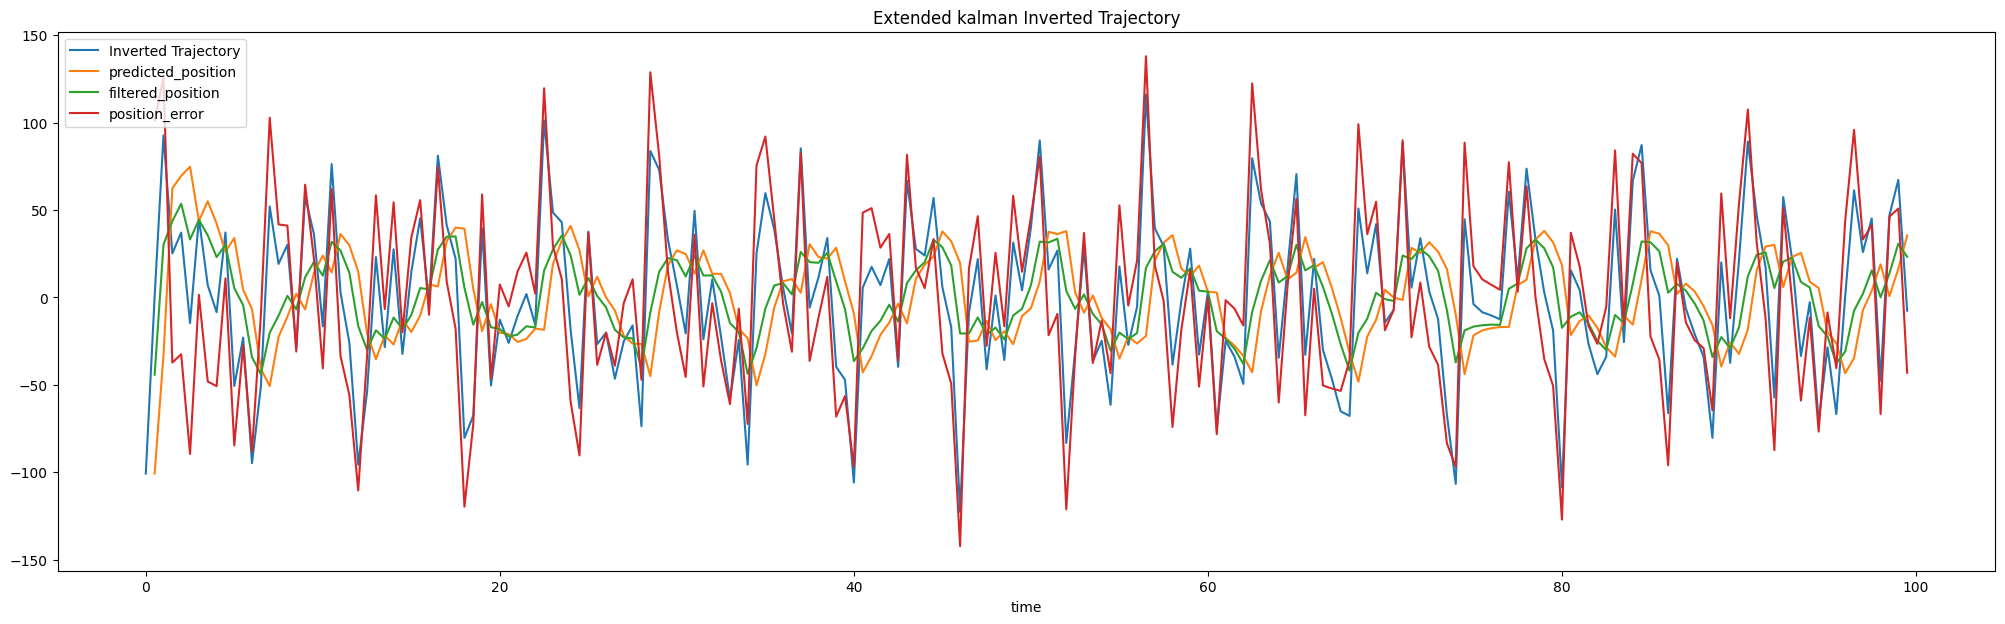

['estimated_position']


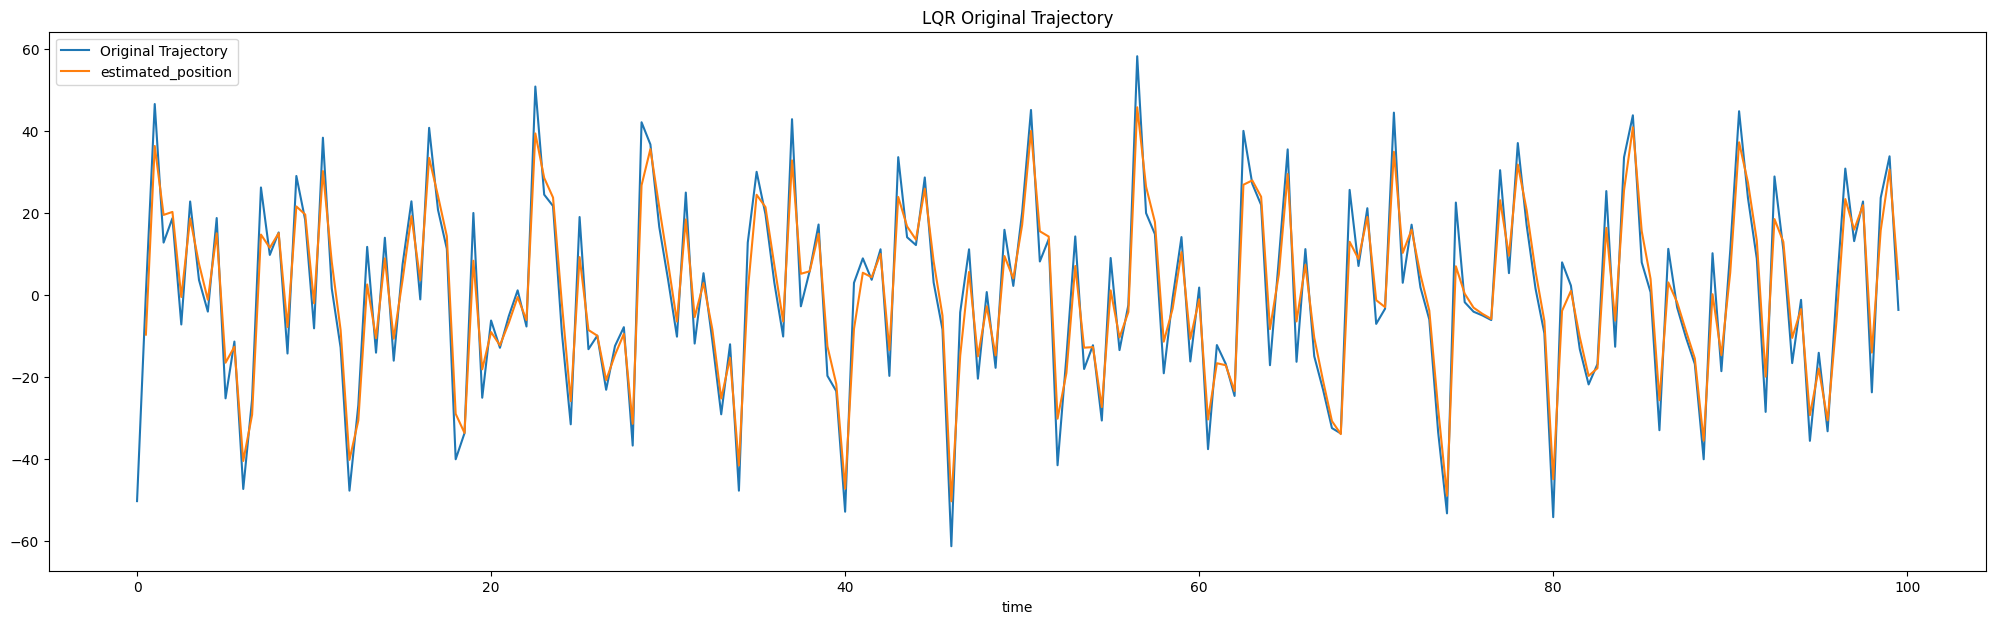

['estimated_position']


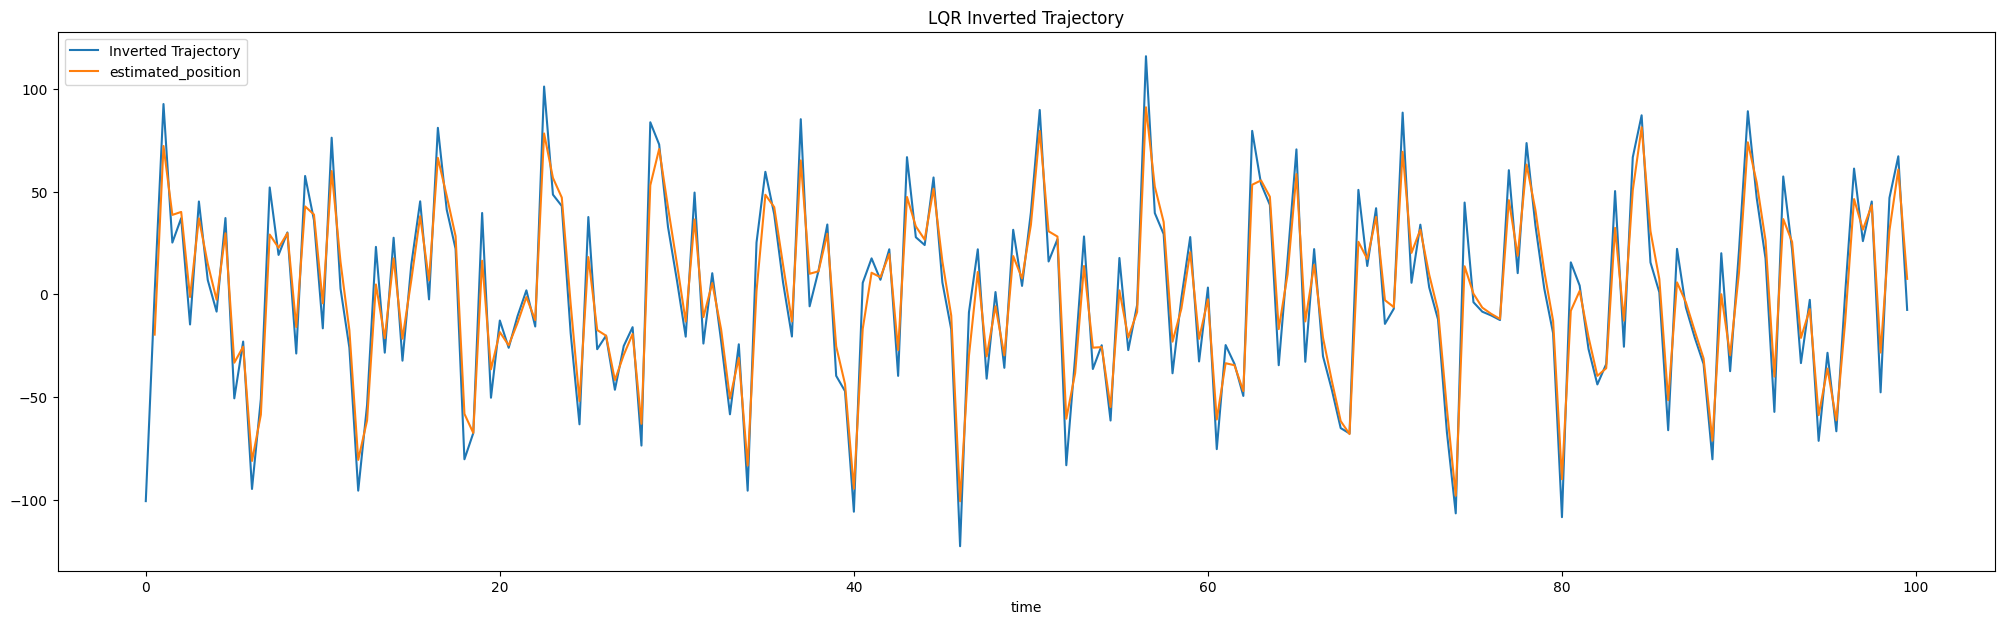

In [330]:
for file in csv_file:
    if file.endswith("_component.csv") or file.endswith("_position.csv"):
        continue
    df = pd.read_csv(file)
    headers = list(df.columns)[1:]
    # remove measured_position if exists
    if "measured_position" in headers:
        headers.remove("measured_position")
    print(headers)

    terms = file.split(".")[0] # Step 1: Remove file extension > 'file_name1'
    terms = terms.split("_")
    title = " ".join(terms) # Step 2: Split the string > ['file', 'name1']
    last_char = title[-1] # Step 3: Get the last character > '1' or '2'
    title = title[:-1] # Step 4: Remove the last character and capitalize the title
    if not(title == 'PID' or title == 'LQR'):
        title = title.capitalize()
    
    # plot in a figure size x=25, y=7
    fig = plt.figure(figsize=(25, 7))
    if last_char == "1":
        plt.plot(trajectory["time"], trajectory["position"])
        title += " Original Trajectory"
        headers.insert(0, "Original Trajectory")
    elif last_char == "2":
        plt.plot(inverted_trajectory["time"], inverted_trajectory["position"])
        title += " Inverted Trajectory"
        headers.insert(0, "Inverted Trajectory")

    for header in headers[1:]:
        plt.plot(df["time"], df[header])

    plt.xlabel("time")
    plt.title("Modeling Trajectory")
    plt.legend(headers, loc="upper left")
    plt.title(title)
    plt.show()